# Example: Portfolio Optimization of the largest US Tech Stocks

## Understanding Portfolio Optimisation

**Portfolio Optimisation** is the process of selecting a combination of stocks in a way that maximises the return on your investment while minimising the risk involved. In simpler terms, it's about **finding the best mix** of stocks that offers the highest potential reward for the least amount of risk.

## Why Portfolio Optimisation Matters

For investment banks and asset management firms, mastering the methods of Portfolio Optimisation is crucial. These methods help them make informed decisions that aim to grow wealth while managing risk effectively. Some of the key methods used in Portfolio Optimisation include:

- **Mean-Variance Optimisation**: This method seeks to find the balance between risk and return by analysing the average returns and the volatility of the stocks in a portfolio.
- **Monte Carlo Simulations**: This technique runs numerous simulations to predict how different portfolios (different variations of asset mix in its composition) might perform in various future market conditions.
- **Risk Parity**: This approach balances the risk contribution of each stock in the portfolio, ensuring that no single stock dominates the overall risk profile.

## Our Focus: Optimising a Tech Stock Portfolio

We will:

- specifically focus on constructing an optimal portfolio of stocks within the tech industry (this helps keep the number of stocks in a portfolio relativly small and reduce the amount of time required to run the optimisation),
- explore the essential Python tools and libraries used in Portfolio Optimisation,
- guide you through the process of calculating fundamental portfolio metrics, and
- demonstrate how proven Portfolio Optimisation strategies can be applied in practice.

### Tools Overview:

- **[Riskfolio-Lib](https://pypi.org/project/Riskfolio-Lib/0.0.5/)**: A Python library designed for portfolio optimisation, focusing on strategic asset allocation. It builds on `cvxpy` and integrates well with `pandas` for managing data.
- **[SciPy `minimize` (SLSQP)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html)**: A function in the SciPy library used for numerical optimisation (`minimize(method='SLSQP')`). It helps find the minimum of a function using Sequential Least Squares Programming (SLSQP), which is useful in optimising portfolio parameters.
- **[MPT and Monte Carlo Simulations](https://github.com/akashprem12/Portfolio-Optimisation-using-Monte-Carlo-Simulation/blob/master/Portfolio%20Optimisation%20using%20Monte%20Carlo%20Simulation.ipynb)**: Modern Portfolio Theory (MPT) uses Monte Carlo simulations to explore different portfolio combinations. The goal is to find the portfolio with the maximum Sharpe ratio, balancing risk and return.
- **[Portfolio Rebalancing](https://medium.com/@javier.castillo.guillen/a-step-by-step-guide-to-portfolio-rebalancing-with-python-2750b3f88793)**: This technique involves periodically adjusting the portfolio to ensure it stays aligned with the investor's goals, particularly in response to market changes.
- **[Pyfolio](https://github.com/quantopian/pyfolio)**: A Python library for analysing the performance and risk of financial portfolios. It's designed to work seamlessly with the Zipline library, which is used for backtesting investment strategies.

### Example Structure:
1. **Riskfolio-Lib Mean Risk Optimisation Algorithms**: Discusses various algorithms in Riskfolio-Lib for optimising portfolio risk and return.
2. **MPT and Monte Carlo Simulations for Sharpe Ratio Optimisation**: Explores using Monte Carlo simulations to find the portfolio with the highest Sharpe ratio.
3. **SciPy SLSQP Optimisation Strategy**: Describes how SciPy's SLSQP method is used for precise numerical optimisation in portfolio construction.
4. **Portfolio Rebalancing Strategy**: Covers strategies for keeping a portfolio aligned with investment goals over time.
5. **Pyfolio Backtesting and Analysis**: Demonstrates how Pyfolio can be used to evaluate the historical performance and risk of portfolios.

## Step 0: Install and Load required packages

In [6]:
# Run only once (and restart Kernel if needed)
# To restart kernel, from Menu -> Kernel -> Restart Kernel...
# import sys
# !{sys.executable} -m pip install riskfolio-lib

#!pip install cvxpy
#!pip install openpyxl
#!pip install yfinance
#!pip install riskfolio-lib
#!pip install quandl

# To check Riskfolio-Lin installation:
# !pip show riskfolio-lib
# dir(rp)

In [56]:
from datetime import datetime, timedelta            # needed for date and time operations and date and time maths

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px

import pandas as pd
pd.options.display.float_format = '{:.4}'.format   # display numeric values in Pandas up to 4 decimal points only

import yfinance as yf                               # for data download from YahooFinance

import warnings                                     # manage Python warnings (to mute and/or ignore)
warnings.filterwarnings("ignore")

import riskfolio as rp
import quandl

## Step 1: Select the universe of assets and time period

In the context of Portfolio Optimisation, the term **universe** refers to the set of all assets that you will consider when constructing your portfolio. Essentially, it represents the entire "pool" of investment options available to you for a specific portfolio. Selecting the universe of assets is a crucial first step in portfolio optimisation because it determines the range of opportunities and risks you can manage. The broader or more diverse the universe, the more options you have to diversify your portfolio and potentially reduce risk. However, a larger universe can also make the optimisation process more complex, as there are more combinations of assets to evaluate.

In [10]:
# Select stocks by specifying tickers of assets (check on https://au.finance.yahoo.com/)
assets = ['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE',
          'NFLX', 'SAP', 'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC',
          'GOOG', 'MSFT', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM']

# Select the time period for analysis
start = '2020-01-01'
end = '2024-07-26'

## Step 2: Download data

In [13]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [15]:
# Display your data
data

DELL  ABNB  PANW  BKNG  UBER       IBM  SCCO  ADBE  \
Date                                                                            
2020-01-02 00:00:00+00:00 72.88   NaN 334.4  49.1  94.9  2.06e+03 166.3 24.83   
2020-01-03 00:00:00+00:00 72.17   NaN 331.8  48.6 93.75 2.051e+03 165.4 24.01   
2020-01-06 00:00:00+00:00 72.74   NaN 333.7 48.39 95.14 2.033e+03 172.7 24.25   
2020-01-07 00:00:00+00:00  72.4   NaN 333.4 48.25 95.34 2.053e+03 175.2 23.64   
2020-01-08 00:00:00+00:00 73.57   NaN 337.9 47.83  94.6 2.048e+03 176.5 23.74   
...                         ...   ...   ...   ...   ...       ...   ...   ...   
2024-07-19 00:00:00+00:00 224.1 148.0 551.0 151.6 183.1 3.958e+03 247.2 125.4   
2024-07-22 00:00:00+00:00 223.7 150.2 554.8 155.9 182.6   3.9e+03 253.7 128.3   
2024-07-23 00:00:00+00:00 224.7 148.8 546.0 154.0 186.4  3.91e+03 255.7 125.8   
2024-07-24 00:00:00+00:00 218.3 144.2 531.0 144.6 180.8 3.797e+03 249.4 116.1   
2024-07-25 00:00:00+00:00 217.2 140.0 532.2 138.3 179.9 3.651e+03 256.1 111.4   

                           NFLX   SAP  ...  INTC  GOOG  MSFT  NVDA  AMZN  \
Date                                   ...                                 
2020-01-02 00:00:00+00:00  68.2 103.4  ... 5.973 50.06 78.47 110.8 125.2   
2020-01-03 00:00:00+00:00 67.87 102.6  ... 5.878 49.88 78.94 108.8 122.6   
2020-01-06 00:00:00+00:00 69.54 102.4  ... 5.902 50.14 80.09 110.2 122.8   
2020-01-07 00:00:00+00:00  69.5 102.5  ... 5.974 50.25 80.55 109.7 122.3   
2020-01-08 00:00:00+00:00 70.04 103.3  ... 5.985 50.45 79.52 111.8 123.6   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
2024-07-19 00:00:00+00:00 179.2 181.7  ... 117.9 138.6 330.9 59.33 197.2   
2024-07-22 00:00:00+00:00 183.1 182.6  ... 123.5 140.2 333.7 60.77 200.5   
2024-07-23 00:00:00+00:00 183.4 182.5  ... 122.6 143.1 335.6 59.71 214.8   
2024-07-24 00:00:00+00:00 174.1 182.4  ... 114.2 138.8 324.2 58.07 209.4   
2024-07-25 00:00:00+00:00 168.9 190.3  ... 112.3 137.8 320.1 57.22 210.8   

                           META  TSLA  AAPL   AMD   CRM  
Date                                                     
2020-01-02 00:00:00+00:00 34.31 28.68 27.15 113.5 30.99  
2020-01-03 00:00:00+00:00 33.38 29.53 27.19 112.0 31.37  
2020-01-06 00:00:00+00:00 33.44  30.1 27.79 111.2 31.58  
2020-01-07 00:00:00+00:00 33.49 31.27 28.03 113.3 32.81  
2020-01-08 00:00:00+00:00 33.68 32.81 28.52 113.6 33.93  
...                         ...   ...   ...   ...   ...  
2024-07-19 00:00:00+00:00 103.2 239.2 96.01 197.8 67.31  
2024-07-22 00:00:00+00:00 103.8 251.5 100.4 204.5 67.73  
2024-07-23 00:00:00+00:00 104.5 246.4 100.9 197.0 67.52  
2024-07-24 00:00:00+00:00 103.0 216.0 89.32 197.0 66.14  
2024-07-25 00:00:00+00:00 103.2 220.2 90.88 195.9 65.74  

[1148 rows x 25 columns]

## Step 3: Process your data

In [18]:
# Calculating returns
Y = data[assets].pct_change().dropna()

## Build a portfolio

In [21]:
# STEP 1: Building the portfolio object from your returns data
port = rp.Portfolio(returns=Y)

# STEP 2: Select method and estimate input parameters:
method_mu='hist'             # Method to estimate expected returns based on historical data.
method_cov='hist'            # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# STEP 3: Estimate optimal portfolio:
model='Classic'              # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV'                    # Risk measure used, this time will be variance
obj = 'Sharpe'               # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True                  # Use historical scenarios for risk measures that depend on scenarios
rf = 0                       # Risk free rate
l = 0                        # Risk aversion factor, only useful when obj is 'Utility'
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [23]:
display(w.T)                                     # display portfolio weights (raw)
(w.T).mul(100).applymap(lambda x: f'{x:.2f}%')   # display portfolio weights (in %)

DELL      ABNB      PANW      BKNG      UBER       IBM      SCCO  \
weights 1.101e-10 3.101e-11 3.186e-11 2.498e-11 3.628e-11 1.396e-10 3.629e-11   

           ADBE      NFLX    SAP  ...   INTC   GOOG   MSFT      NVDA  \
weights 0.08948 1.321e-10 0.3657  ... 0.2347 0.1123 0.1261 1.448e-11   

             AMZN    META      TSLA      AAPL       AMD       CRM  
weights 1.945e-10 0.07177 3.415e-11 2.546e-11 4.946e-11 4.237e-11  

[1 rows x 25 columns]

DELL   ABNB   PANW   BKNG   UBER    IBM   SCCO   ADBE   NFLX  \
weights  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%  8.95%  0.00%   

            SAP  ...    INTC    GOOG    MSFT   NVDA   AMZN   META   TSLA  \
weights  36.57%  ...  23.47%  11.23%  12.61%  0.00%  0.00%  7.18%  0.00%   

          AAPL    AMD    CRM  
weights  0.00%  0.00%  0.00%  

[1 rows x 25 columns]

## Analyse portfolio(s)

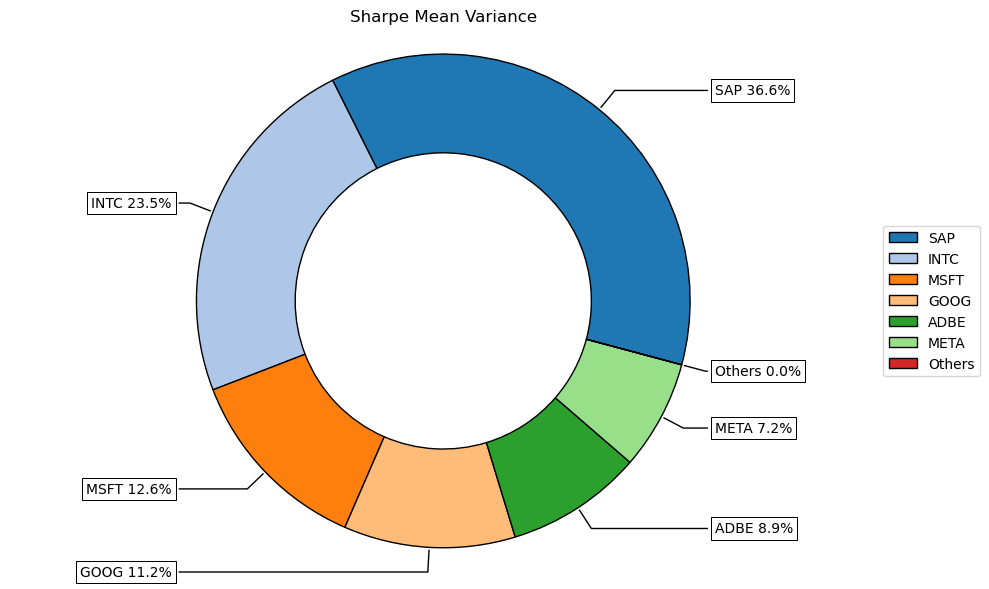

In [26]:
# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

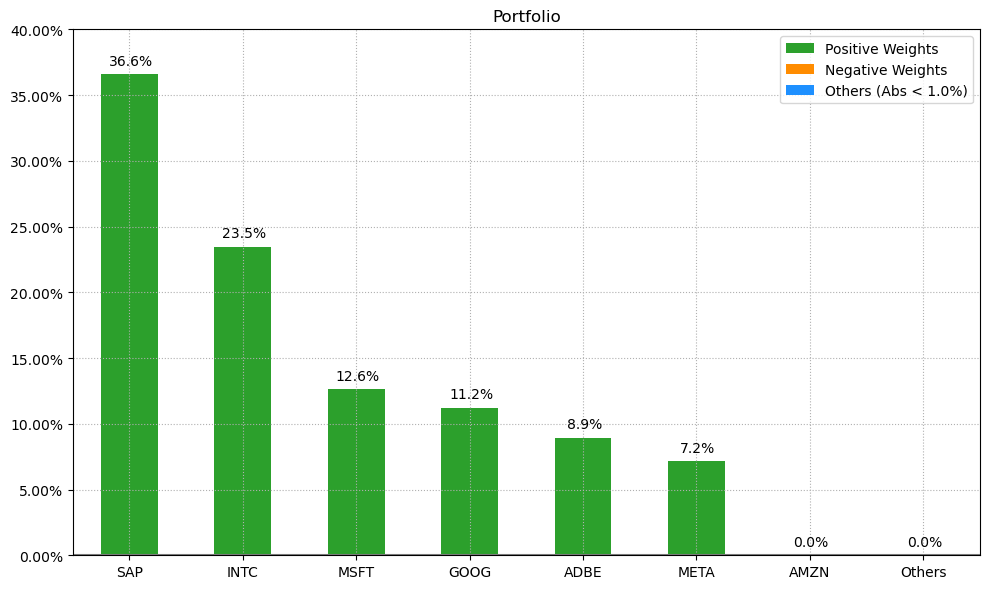

In [36]:
ax = rp.plot_bar(w,
                 title='Portfolio',
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

### Calculate efficient frontier

In [39]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

DELL      ABNB      PANW      BKNG      UBER       IBM      SCCO  \
0   0.05908 7.606e-10 1.285e-09 3.602e-10 1.754e-09   0.04519 1.867e-09   
1   0.01574 3.812e-10 4.081e-10 2.512e-10 4.959e-10   0.02071 4.881e-10   
2 5.442e-08 4.915e-10 5.075e-10 3.414e-10 6.217e-10  0.007978 5.967e-10   
3 9.619e-09 5.223e-10 5.433e-10 3.617e-10 6.706e-10 4.054e-08 6.409e-10   
4 5.932e-09 6.069e-10 6.362e-10 4.298e-10 7.759e-10 9.004e-09 7.485e-10   

       ADBE      NFLX    SAP  ...      INTC   GOOG    MSFT      NVDA  \
0 4.659e-09   0.01139 0.4668  ... 3.434e-10 0.0658 0.03929 1.498e-09   
1   0.05143     0.016 0.4414  ...   0.02585 0.1101 0.09748  1.78e-10   
2   0.06026  0.009039 0.4469  ...   0.06472 0.1209  0.1083  2.14e-10   
3   0.06743 2.344e-06 0.4494  ...   0.09861 0.1298  0.1172 2.262e-10   
4   0.07312 1.345e-08 0.4471  ...    0.1293 0.1361  0.1236 2.645e-10   

       AMZN    META      TSLA      AAPL       AMD       CRM  
0    0.0849 0.05926 7.148e-10 3.135e-10   0.05814 1.219e-09  
1   0.05366 0.08635 4.911e-10 2.218e-10 1.287e-09 6.533e-10  
2   0.03858 0.08949 6.094e-10 3.265e-10 1.132e-09 7.798e-10  
3   0.02318 0.09112 6.186e-10 3.583e-10 1.107e-09 8.121e-10  
4 4.118e-06 0.09084 7.126e-10 4.315e-10 1.205e-09 9.233e-10  

[5 rows x 25 columns]

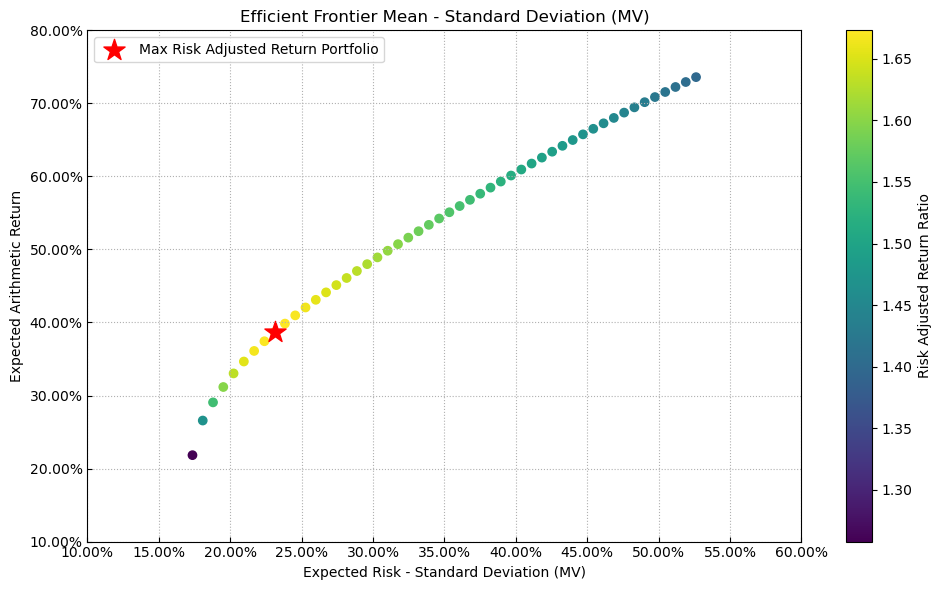

In [41]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

### Plotting efficient frontier composition

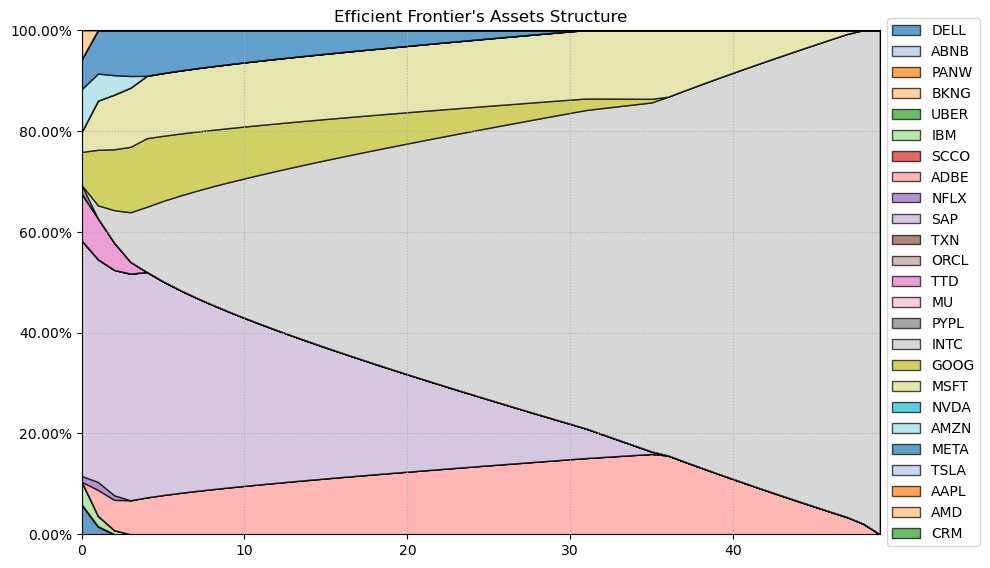

In [43]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

Re-label x-axis in the plot above from numerical position of portfolios to their Volatility so that it matches the efficient frontier plot

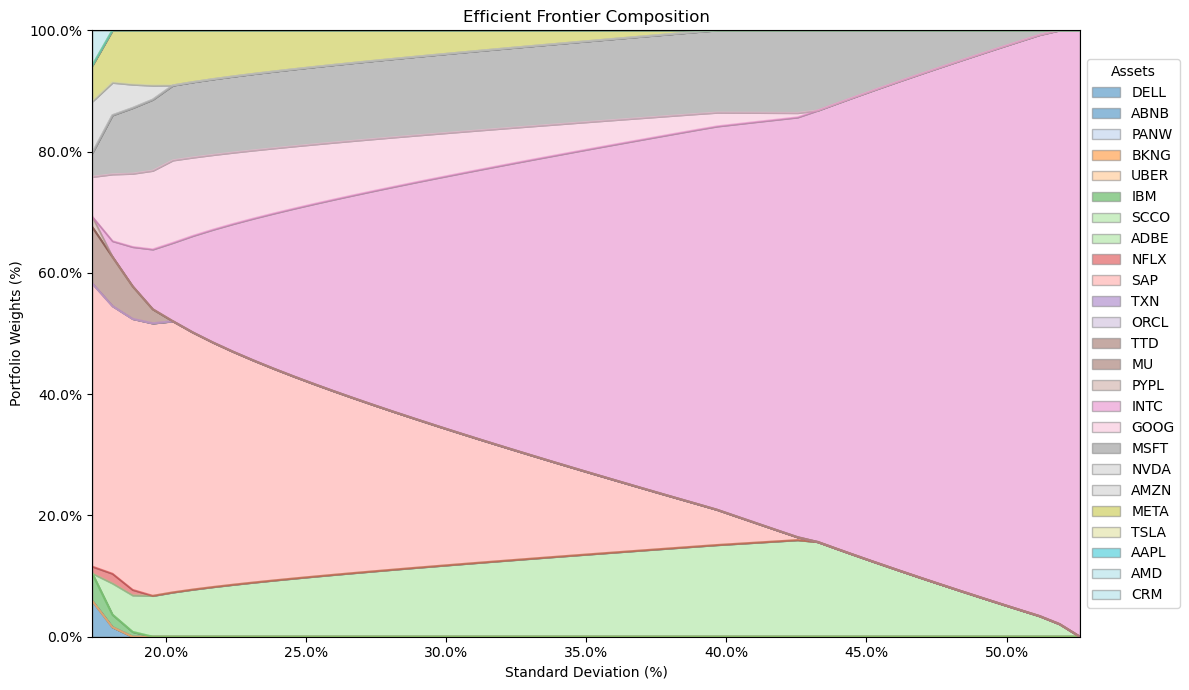

In [48]:
# Step 1: Compute the portfolio standard deviations
# Transpose 'frontier' to align dimensions for matrix multiplication
# 'frontier' is a DataFrame with assets as rows and portfolios as columns
# 'cov' is the covariance matrix of asset returns
portfolio_variances = np.diag(frontier.T @ cov @ frontier)
portfolios_std = np.sqrt(portfolio_variances)*np.sqrt(252)  # Annualize if necessary

# Step 2: Create a new DataFrame with standard deviations as index
frontier_std = (frontier.T).copy()
frontier_std['Standard Deviation'] = portfolios_std
frontier_std = frontier_std.set_index('Standard Deviation')
frontier_std = frontier_std.sort_index()

# Step 3: Plot the area chart
ax = frontier_std.plot(kind='area', stacked=True, cmap='tab20', figsize=(12, 7),
                      alpha=0.5,  # Set transparency
                      )
ax.set_xlabel('Standard Deviation (%)')
ax.set_ylabel('Portfolio Weights (%)')
ax.set_title('Efficient Frontier Composition')

# Set x-axis and y-axis to show percentage format
ax.xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=1))  # xmax=1 scales 1.0 to 100%
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=1))

# Manually set edge colors to grey
for polygon in ax.collections:
    polygon.set_edgecolor('grey')

# Position the legend outside the plot area on the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Assets')

plt.tight_layout()  # Adjust layout to accommodate the legend
ax.set_ylim(0, 1)  # y-axis limits
ax.margins(0) 
plt.show()

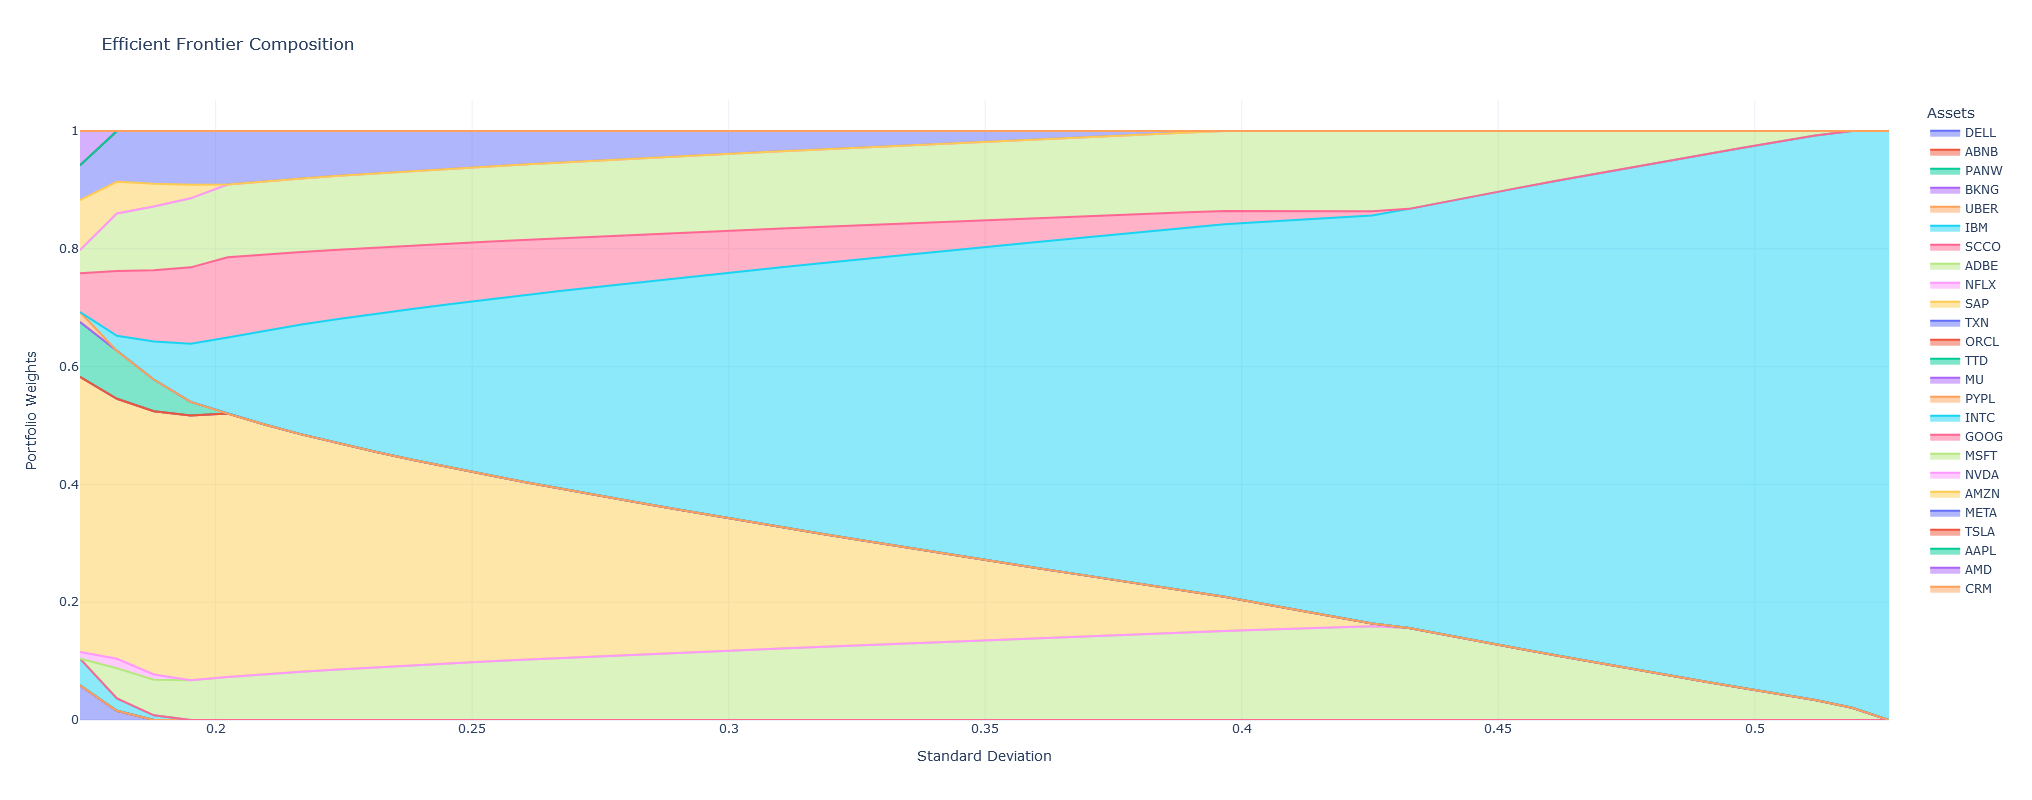

In [54]:
# Prepare the DataFrame for Plotly
# Reset the index to make 'Standard Deviation' a column
frontier_std_reset = frontier_std.reset_index()

# Melt the DataFrame from wide to long format
frontier_long = pd.melt(
    frontier_std_reset,
    id_vars=['Standard Deviation'],
    value_vars=frontier_std_reset.columns.drop('Standard Deviation'),
    var_name='Asset',
    value_name='Weight'
)

# Step 4: Plot the interactive area chart using Plotly
fig = px.area(
    frontier_long,
    x='Standard Deviation',
    y='Weight',
    color='Asset',
    title='Efficient Frontier Composition',
    labels={'Standard Deviation': 'Standard Deviation', 'Weight': 'Portfolio Weights'},
    template='plotly_white',
    width=1400,
    height=800
)

# Update hover information to display asset and weight in percentage with 2 decimal points
fig.update_traces(
    hovertemplate="%{y:.2%}",
    customdata=frontier_long[['Asset']].values
)

# Optional: Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Standard Deviation',
    yaxis_title='Portfolio Weights',
    legend_title='Assets',
    hovermode='x unified'
)

# Display the interactive plot
fig.show()